In [1]:
import pandas as pd
import openpyxl
dataset01 = pd.read_csv('./dataset/kc_data_1.csv')
dataset02 = pd.read_csv('./dataset/kc_data_2.csv')
dataset = pd.concat([dataset01, dataset02])
# 서울만 분리해냄
dataset = dataset[dataset['시도명']=='서울']

In [2]:
guide_date = dataset['기준년월'].unique()
print(guide_date)
dataset_2018 = dataset[dataset['기준년월'] == guide_date[0]]
dataset_2019 = dataset[dataset['기준년월'] == guide_date[1]]
dataset_2020 = dataset[dataset['기준년월'] == guide_date[2]]
dataset = dataset[dataset['기준년월'] == guide_date[0]]

['2018-12' '2019-12' '2020-12']


In [3]:
# 서울시 시군구명 추출
# 결과 : 25개 모두 존재
sigoongu = list(set(dataset['시군구명']))
print(len(sigoongu), '개')
print(sigoongu)

25 개
['은평구', '강서구', '중구', '노원구', '마포구', '동작구', '강남구', '종로구', '서초구', '광진구', '강북구', '구로구', '도봉구', '강동구', '송파구', '금천구', '용산구', '성동구', '중랑구', '동대문구', '성북구', '서대문구', '관악구', '양천구', '영등포구']


In [4]:
# 강동구에 존재하는 업종중분류명종류 추출
kangdonggu = dataset[dataset['시군구명']=='강동구']
kangdonggu_upjong = list(set(kangdonggu['업종중분류명']))
print(kangdonggu_upjong)

['숙박업', '광업 지원 서비스업', '전문 서비스업', '전기, 가스, 증기 및 공기조절 공급업', '교육 서비스업', '기타 운송장비 제조업', '보건업', '가죽, 가방 및 신발 제조업', '산업용 기계 및 장비 수리업', '협회 및 단체', '기타 전문, 과학 및 기술 서비스업', '기타 개인 서비스업', '수상 운송업', '출판업', '종합 건설업', '환경 정화 및 복원업', '보험 및 연금업', '비금속 광물제품 제조업', '의복, 의복 액세서리 및 모피제품 제조업', '음식점 및 주점업', '창고 및 운송관련 서비스업', '어업', '전문직별 공사업', '금융 및 보험 관련 서비스업', '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업', '가구 제조업', '영상ㆍ오디오 기록물 제작 및 배급업', '육상운송 및 파이프라인 운송업', '금융업', '우편 및 통신업', '의료, 정밀, 광학기기 및 시계 제조업', '연구개발업', '부동산업', '건축기술, 엔지니어링 및 기타 과학기술 서비스업', '목재 및 나무제품 제조업; 가구 제외', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '창작, 예술 및 여가관련 서비스업', '농업', '인쇄 및 기록매체 복제업', '음료 제조업', '사업시설 관리 및 조경 서비스업', '스포츠 및 오락관련 서비스업', '펄프, 종이 및 종이제품 제조업', '도매 및 상품 중개업', '기타 기계 및 장비 제조업', '정보서비스업', '국제 및 외국기관', '개인 및 소비용품 수리업', '금속가공제품 제조업; 기계 및 가구 제외', '1차 금속 제조업', '임업', '의료용 물질 및 의약품 제조업', '폐기물 수집, 운반, 처리 및 원료 재생업', '사회복지 서비스업', '석탄, 원유 및 천연가스 광업', '방송업', '비금속광물 광업; 연료용 제외', '기타 제품 제조업', '소매업; 자동차 제외', '식료품 제조업', '전기장비 제조업', '사업지원 서비스업', '공공행정, 국방 및 사회보장 행정', '섬유제품

In [5]:
# 각 시군구별 업종중분류명 추출
middle = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    middle.extend(temp)
    print(gu,": ", temp)

은평구 :  ['숙박업', '광업 지원 서비스업', '기타 운송장비 제조업', '전문 서비스업', '교육 서비스업', '전기, 가스, 증기 및 공기조절 공급업', '보건업', '가죽, 가방 및 신발 제조업', '협회 및 단체', '수상 운송업', '기타 전문, 과학 및 기술 서비스업', '기타 개인 서비스업', '산업용 기계 및 장비 수리업', '출판업', '환경 정화 및 복원업', '보험 및 연금업', '섬유제품 제조업; 의복제외', '의복, 의복 액세서리 및 모피제품 제조업', '비금속 광물제품 제조업', '음식점 및 주점업', '창고 및 운송관련 서비스업', '어업', '전문직별 공사업', '금융 및 보험 관련 서비스업', '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업', '가구 제조업', '금융업', '육상운송 및 파이프라인 운송업', '영상ㆍ오디오 기록물 제작 및 배급업', '우편 및 통신업', '의료, 정밀, 광학기기 및 시계 제조업', '항공 운송업', '연구개발업', '부동산업', '건축기술, 엔지니어링 및 기타 과학기술 서비스업', '목재 및 나무제품 제조업; 가구 제외', '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '창작, 예술 및 여가관련 서비스업', '인쇄 및 기록매체 복제업', '사업시설 관리 및 조경 서비스업', '농업', '스포츠 및 오락관련 서비스업', '음료 제조업', '도매 및 상품 중개업', '펄프, 종이 및 종이제품 제조업', '정보서비스업', '기타 기계 및 장비 제조업', '국제 및 외국기관', '개인 및 소비용품 수리업', '금속가공제품 제조업; 기계 및 가구 제외', '1차 금속 제조업', '임업', '폐기물 수집, 운반, 처리 및 원료 재생업', '의료용 물질 및 의약품 제조업', '사회복지 서비스업', '자동차 및 트레일러 제조업', '방송업', '비금속광물 광업; 연료용 제외', '기타 제품 제조업', '소매업; 자동차 제외', '식료품 제조업', '전기장비 제조업', '사업지원 서비스업', '공공행

In [6]:
# 각 시군구별 업종대분류명 추출
big = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    big.extend(temp)
    print(gu,": ", temp)

은평구 :  ['숙박 및 음식점업', '금융 및 보험업', '건설업', '협회 및 단체, 수리 및 기타 개인 서비스업', '농업, 임업 및 어업', '사업시설 관리, 사업 지원 및 임대 서비스업', '정보통신업', '교육 서비스업', '운수 및 창고업', '광업', '전기, 가스, 증기 및 공기조절 공급업', '제조업', '보건업 및 사회복지 서비스업', '수도, 하수 및 폐기물 처리, 원료 재생업', '국제 및 외국기관', '부동산업', '도매 및 소매업', '전문, 과학 및 기술 서비스업', '공공행정, 국방 및 사회보장 행정', '예술, 스포츠 및 여가관련 서비스업']
강서구 :  ['숙박 및 음식점업', '금융 및 보험업', '건설업', '농업, 임업 및 어업', '협회 및 단체, 수리 및 기타 개인 서비스업', '사업시설 관리, 사업 지원 및 임대 서비스업', '정보통신업', '교육 서비스업', '운수 및 창고업', '광업', '전기, 가스, 증기 및 공기조절 공급업', '제조업', '수도, 하수 및 폐기물 처리, 원료 재생업', '보건업 및 사회복지 서비스업', '공공행정, 국방 및 사회보장 행정', '부동산업', '도매 및 소매업', '전문, 과학 및 기술 서비스업', '예술, 스포츠 및 여가관련 서비스업']
중구 :  ['숙박 및 음식점업', '금융 및 보험업', '건설업', '농업, 임업 및 어업', '전기, 가스, 증기 및 공기조절 공급업', '광업', '정보통신업', '사업시설 관리, 사업 지원 및 임대 서비스업', '운수 및 창고업', '교육 서비스업', '협회 및 단체, 수리 및 기타 개인 서비스업', '제조업', '수도, 하수 및 폐기물 처리, 원료 재생업', '공공행정, 국방 및 사회보장 행정', '보건업 및 사회복지 서비스업', '부동산업', '도매 및 소매업', '전문, 과학 및 기술 서비스업', '국제 및 외국기관', '예술, 스포츠 및 여가관련 서비스업']
노원구 :  ['숙박 및 음식점업', '금융 및 보험업', '건설업',

In [7]:
# 시군구변 존재하는 업종중분류명과 존재하지 않는 것을 dataframe으로 표현
middle = list(set(middle))
big = list(set(big))

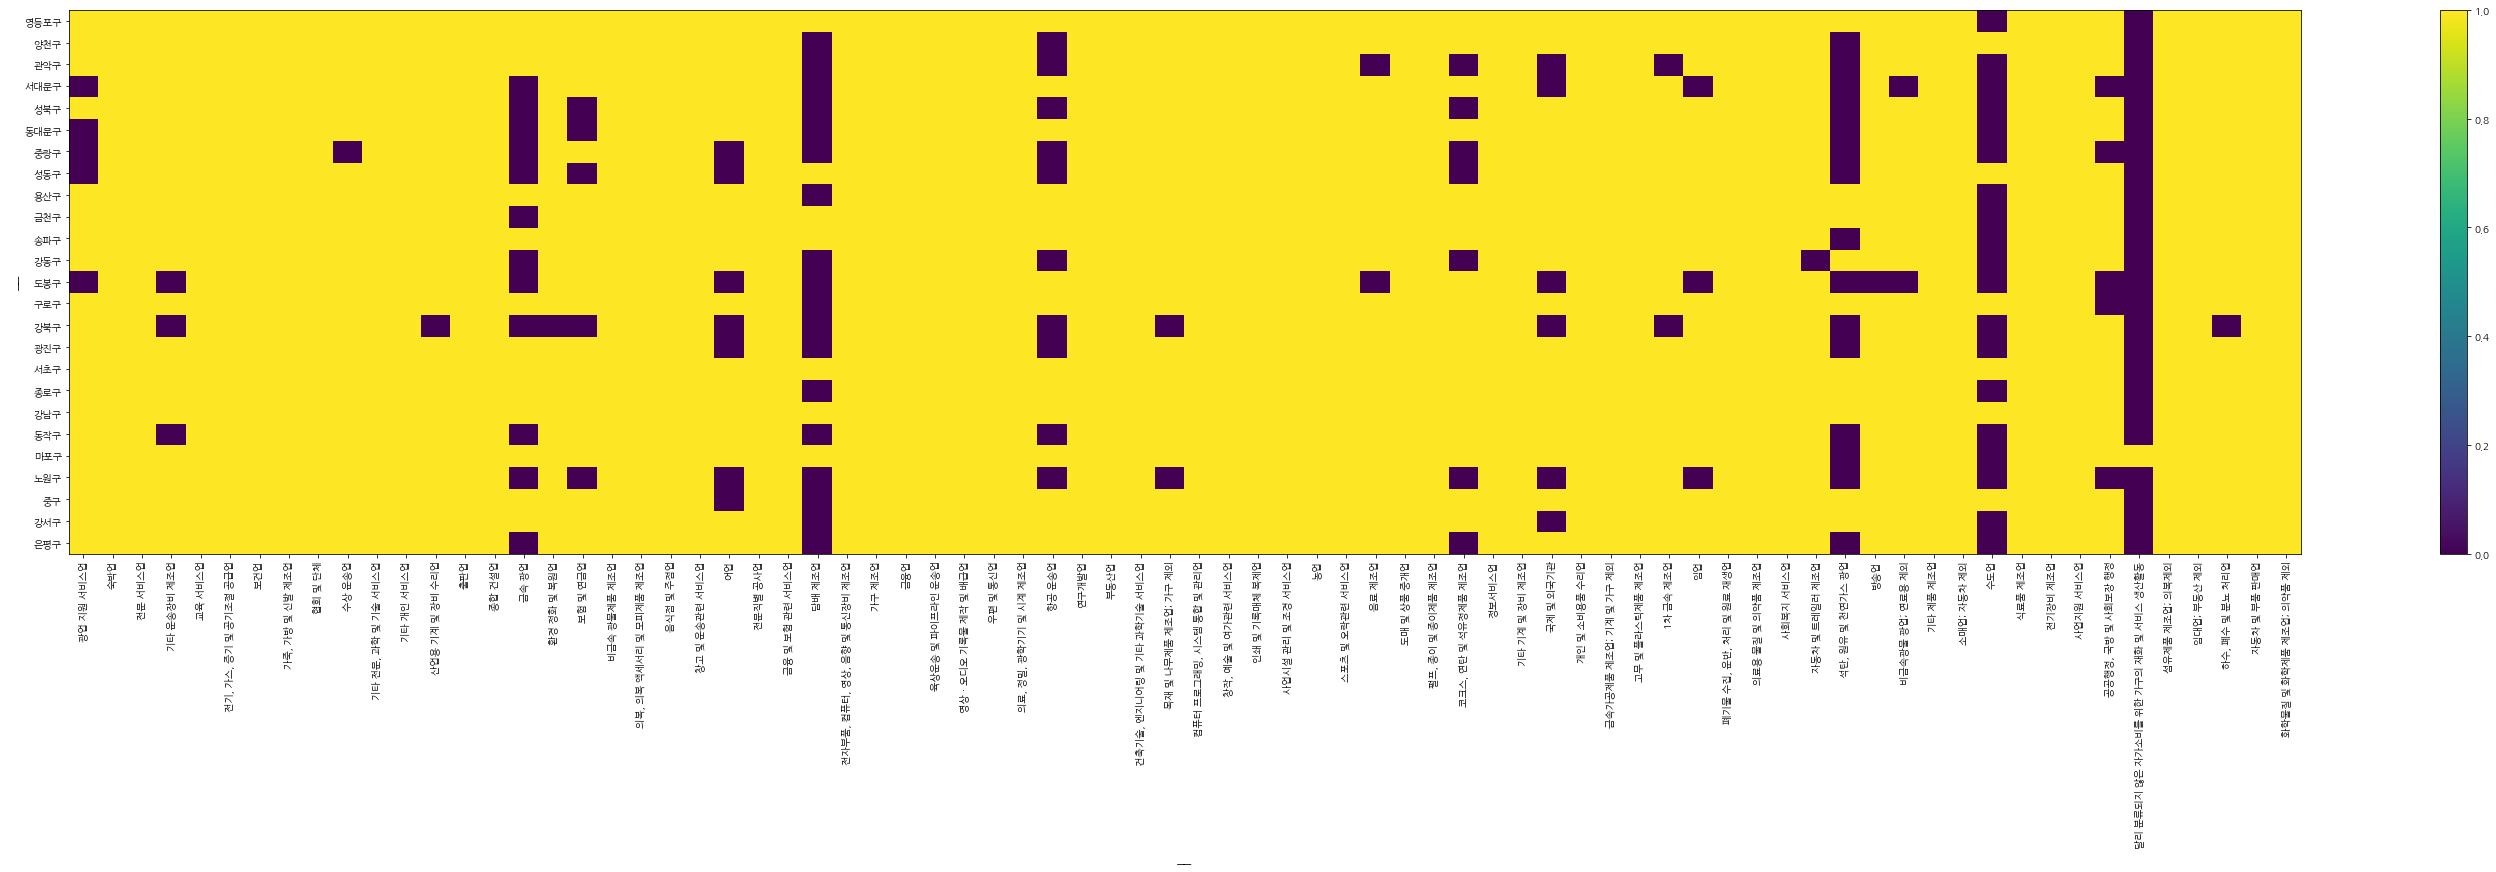

In [30]:
import matplotlib.pyplot as plt
import numpy as np

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종중분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

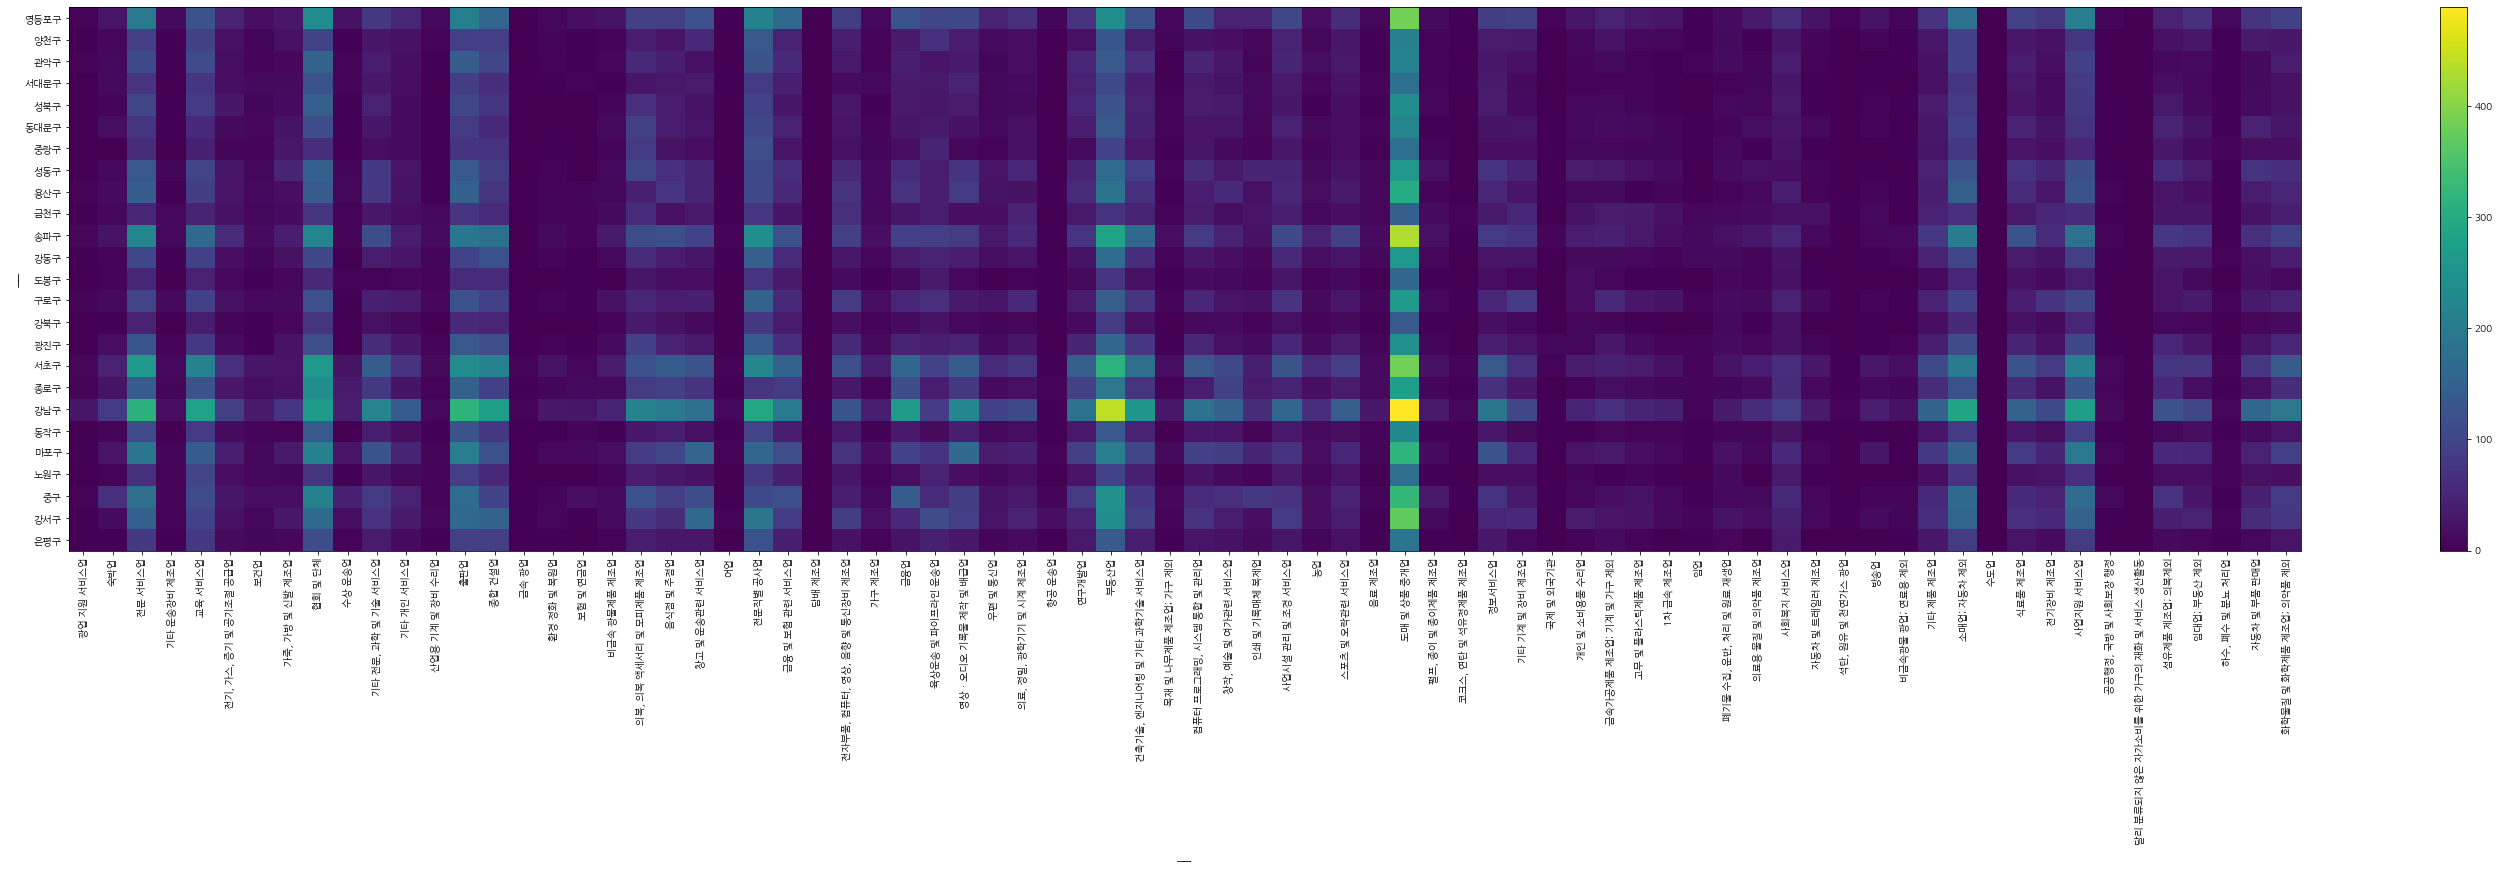

In [29]:
import matplotlib.pyplot as plt
import numpy as np

pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    title = list(set(temp['업종중분류명']))
    title_count = temp['업종중분류명'].value_counts().to_dict()
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=middle)
big_pack = big_pack.fillna(0)
big_pack.head(10)
plt.figure(figsize=(50,10))
plt.pcolor(big_pack)
plt.xticks(np.arange(0.5, len(big_pack.columns), 1), big_pack.columns, rotation=90)
plt.yticks(np.arange(0.5, len(big_pack.index), 1), big_pack.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [10]:
# 시군구에 존재하는 업종대분류명과 존재하지 않는 것을 dataframe으로 표현
pack = []
for gu in sigoongu:
    temp = dataset[dataset['시군구명']==gu]
    temp = list(set(temp['업종대분류명']))
    temp_dict = {}
    for t in temp:
        temp_dict[t] = 1
    pack.append(temp_dict)

big_pack = pd.DataFrame(pack, index=sigoongu, columns=big)
big_pack.head(10)

,"전기, 가스, 증기 및 공기조절 공급업",교육 서비스업,광업,숙박 및 음식점업,"농업, 임업 및 어업","협회 및 단체, 수리 및 기타 개인 서비스업",제조업,"수도, 하수 및 폐기물 처리, 원료 재생업",부동산업,도매 및 소매업,...,"예술, 스포츠 및 여가관련 서비스업",금융 및 보험업,건설업,"사업시설 관리, 사업 지원 및 임대 서비스업",운수 및 창고업,국제 및 외국기관,가구 내 고용활동 및 달리 분류되지 않은 자가소비 생산활동,정보통신업,보건업 및 사회복지 서비스업,"공공행정, 국방 및 사회보장 행정"
은평구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0
강서구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,NaN,NaN,1,1,1.0
중구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0
노원구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,NaN,NaN,1,1,NaN
마포구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,1.0,1,1,1.0
동작구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0
강남구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0
종로구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0
서초구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0
광진구,1,1,1.0,1,1,1,1,1,1,1,...,1,1,1,1,1,1.0,NaN,1,1,1.0


['미분류', '중견기업', '대기업', '소기업', '중기업', '판단제외']


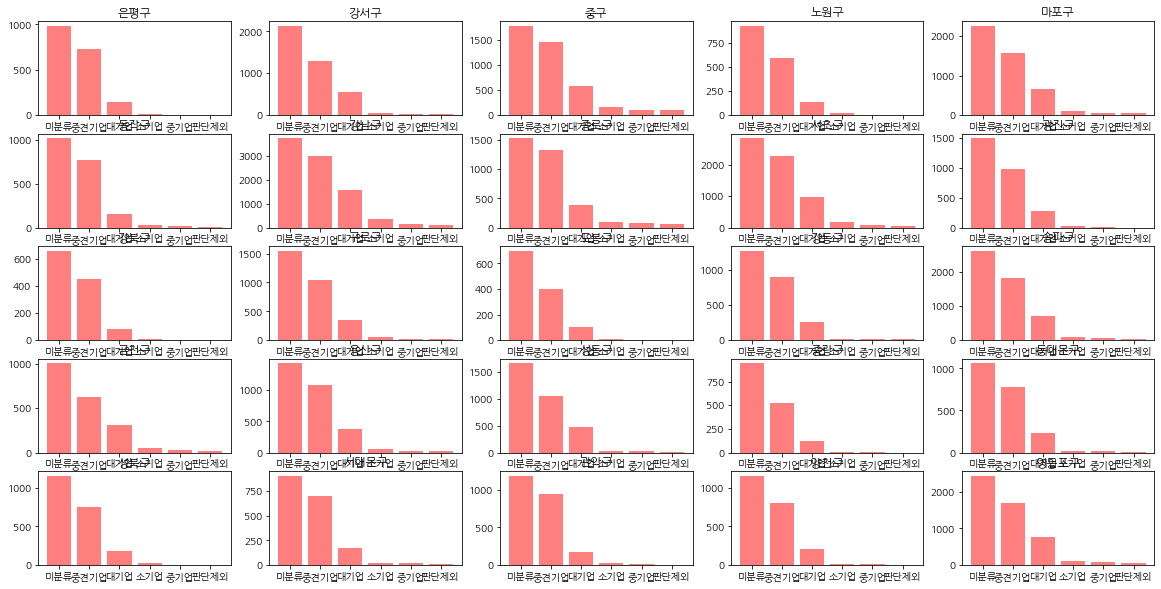

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
# 시군구별 기업 구분 개수 추출
company_dis = list(set(dataset['기업구분']))
print(company_dis)

plt.figure(figsize=(20,10))
for index, gu in enumerate(sigoongu):
    base = [ 0 for i in range(len(company_dis))]
    temp = dataset[dataset['시군구명']==gu]
    temp = temp['기업구분'].value_counts()
    for i, t in enumerate(temp):
        base[i] += t
    plt.subplot(5,5,index+1)
    plt.bar(company_dis, base, color='red', alpha=0.5)
    plt.title(gu)
plt.show()

In [12]:
# 2018부터 2020까지 기업 개수에 대한 변화는 존재하지 않음
# 즉 망한 회사가 없다고 봐도 괜찮을

2019 시군구 전체 기업 구분 개수 추츨
소기업     39115
미분류     29541
중기업     10030
중견기업     1485
판단제외      929
대기업       707
Name: 기업구분, dtype: int64


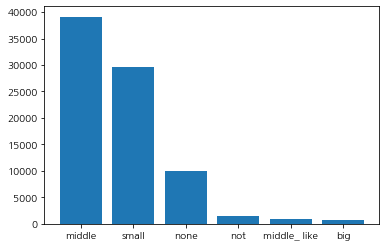

In [13]:
# 시군구 전체 기업 구분 개수 추출
#         ['중기업', '소기업', '미분류', '판단제외', '중견기업', '대기업']
x_label = ['middle', 'small', 'none', 'not', 'middle_ like', 'big']
print('2019 시군구 전체 기업 구분 개수 추츨')
print(dataset_2019['기업구분'].value_counts())
dataset_2018_total = dataset_2019['기업구분'].value_counts().tolist()
plt.bar(x_label, dataset_2018_total)
plt.show()

2019 시군구 전체 기업 구분 개수 추츨
소기업     39115
미분류     29541
중기업     10030
중견기업     1485
판단제외      929
대기업       707
Name: 기업구분, dtype: int64


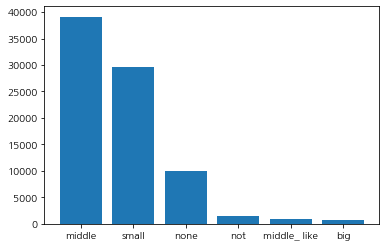

In [14]:
# 시군구 전체 기업 구분 개수 추출
#         ['중기업', '소기업', '미분류', '판단제외', '중견기업', '대기업']
x_label = ['middle', 'small', 'none', 'not', 'middle_ like', 'big']
print('2019 시군구 전체 기업 구분 개수 추츨')
print(dataset_2019['기업구분'].value_counts())
dataset_2019_total = dataset_2019['기업구분'].value_counts().tolist()
plt.bar(x_label, dataset_2019_total)
plt.show()

2019 시군구 전체 기업 구분 개수 추츨
소기업     39115
미분류     29541
중기업     10030
중견기업     1485
판단제외      929
대기업       707
Name: 기업구분, dtype: int64


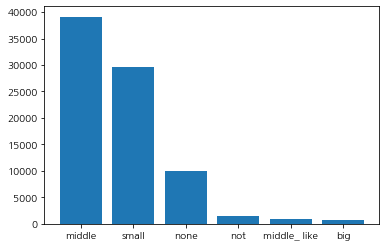

In [15]:
# 시군구 전체 기업 구분 개수 추출
#         ['중기업', '소기업', '미분류', '판단제외', '중견기업', '대기업']
x_label = ['middle', 'small', 'none', 'not', 'middle_ like', 'big']
print('2019 시군구 전체 기업 구분 개수 추츨')
print(dataset_2019['기업구분'].value_counts())
dataset_2020_total = dataset_2019['기업구분'].value_counts().tolist()
plt.bar(x_label, dataset_2020_total)
plt.show()